1. Sequenial API -> built-in layers
2. Functitonal API -> customer layers, metrics, losses
3. Subclassing -> write from scratch

In [1]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict(([row],))
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.897
Predicted: 0.990


In [17]:
X_train.shape

(235, 34)

In [2]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
W = tf.Variable(rng.randn(), name="Weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
def linearregression(x):
    return W*x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred-y_true))

learning_rate = 0.01
training_steps = 1000
display_step = 50

optimizer = tf.keras.optimizers.SGD(learning_rate)

In [6]:
def run_optimization():

    with tf.GradientTape() as g:
        pred = linearregression(X)
        loss = mean_square(pred, Y)
        
    gradients = g.gradient(loss, [W,b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
for step in range(1, training_steps +1):
    run_optimization()
    if step % display_step == 0:
        pred = linearregression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.234229, W: 0.365287, b: -0.006938
step: 100, loss: 0.216887, W: 0.352281, b: 0.085267
step: 150, loss: 0.203287, W: 0.340763, b: 0.166921
step: 200, loss: 0.192621, W: 0.330564, b: 0.239231
step: 250, loss: 0.184257, W: 0.321532, b: 0.303266
step: 300, loss: 0.177698, W: 0.313533, b: 0.359973
step: 350, loss: 0.172553, W: 0.306450, b: 0.410191
step: 400, loss: 0.168519, W: 0.300177, b: 0.454662
step: 450, loss: 0.165356, W: 0.294622, b: 0.494044
step: 500, loss: 0.162875, W: 0.289703, b: 0.528919
step: 550, loss: 0.160929, W: 0.285346, b: 0.559803
step: 600, loss: 0.159403, W: 0.281488, b: 0.587153
step: 650, loss: 0.158207, W: 0.278072, b: 0.611373
step: 700, loss: 0.157268, W: 0.275047, b: 0.632822
step: 750, loss: 0.156532, W: 0.272368, b: 0.651816
step: 800, loss: 0.155955, W: 0.269995, b: 0.668636
step: 850, loss: 0.155503, W: 0.267894, b: 0.683532
step: 900, loss: 0.155148, W: 0.266033, b: 0.696723
step: 950, loss: 0.154869, W: 0.264386, b: 0.708404
step: 1000, 

In [8]:
import matplotlib.pyplot as plt

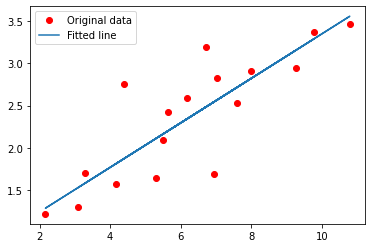

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()